<a href="https://colab.research.google.com/github/ua-datalab/DataEngineering/blob/main/08_Workshop_Mar_25_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pyspark tutorial**

## downloading the data required

In [ ]:
!wget --content-disposition https://arizona.box.com/shared/static/wzdjih2sfu4gxszmfhadkislj3ox4elt.zip

## unzip the zip file which contains the csvs

In [3]:
!unzip  /content/pyspark_data.zip

Archive:  /content/pyspark_data.zip
  inflating: immunizations.csv       
  inflating: medications.csv         
  inflating: observations.csv        
  inflating: patients.csv            


In [4]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

## Download spark

In [5]:
!wget -q https://downloads.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz

## spark extraction

In [6]:
!tar xf spark-3.5.1-bin-hadoop3.tgz

In [7]:
# Install PySpark
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## initialize libraries and locations

In [8]:
import os

# Set the location of Java and Spark
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.master("local[*]").appName("PySpark 3.5.1 Tutorial").getOrCreate()


## load CSVs

In [11]:

patients_df = spark.read.csv("/content/patients.csv", header=True, inferSchema=True)
medications_df = spark.read.csv("/content/medications.csv", header=True, inferSchema=True)
immunizations_df = spark.read.csv("/content/immunizations.csv", header=True, inferSchema=True)
observations_df = spark.read.csv("/content/observations.csv", header=True, inferSchema=True)


## DataFrame Exploration

In [18]:
# Print the schema of each DataFrame
patients_df.printSchema()
medications_df.printSchema()
immunizations_df.printSchema()
observations_df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- BIRTHDATE: date (nullable = true)
 |-- DEATHDATE: date (nullable = true)
 |-- SSN: string (nullable = true)
 |-- DRIVERS: string (nullable = true)
 |-- PASSPORT: string (nullable = true)
 |-- PREFIX: string (nullable = true)
 |-- FIRST: string (nullable = true)
 |-- LAST: string (nullable = true)
 |-- SUFFIX: string (nullable = true)
 |-- MAIDEN: string (nullable = true)
 |-- MARITAL: string (nullable = true)
 |-- RACE: string (nullable = true)
 |-- ETHNICITY: string (nullable = true)
 |-- GENDER: string (nullable = true)
 |-- BIRTHPLACE: string (nullable = true)
 |-- ADDRESS: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- COUNTY: string (nullable = true)
 |-- ZIP: integer (nullable = true)
 |-- LAT: double (nullable = true)
 |-- LON: double (nullable = true)
 |-- HEALTHCARE_EXPENSES: double (nullable = true)
 |-- HEALTHCARE_COVERAGE: double (nullable = true)

root
 |-- START: date (null

In [14]:
patients_df

DataFrame[Id: string, BIRTHDATE: date, DEATHDATE: date, SSN: string, DRIVERS: string, PASSPORT: string, PREFIX: string, FIRST: string, LAST: string, SUFFIX: string, MAIDEN: string, MARITAL: string, RACE: string, ETHNICITY: string, GENDER: string, BIRTHPLACE: string, ADDRESS: string, CITY: string, STATE: string, COUNTY: string, ZIP: int, LAT: double, LON: double, HEALTHCARE_EXPENSES: double, HEALTHCARE_COVERAGE: double]

In [19]:
patients_df.show(10)

+--------------------+----------+---------+-----------+---------+----------+------+---------------+--------------+------+-----------+-------+-----+-----------+------+--------------------+--------------------+-----------+-------------+----------------+----+------------------+------------------+-------------------+-------------------+
|                  Id| BIRTHDATE|DEATHDATE|        SSN|  DRIVERS|  PASSPORT|PREFIX|          FIRST|          LAST|SUFFIX|     MAIDEN|MARITAL| RACE|  ETHNICITY|GENDER|          BIRTHPLACE|             ADDRESS|       CITY|        STATE|          COUNTY| ZIP|               LAT|               LON|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|
+--------------------+----------+---------+-----------+---------+----------+------+---------------+--------------+------+-----------+-------+-----+-----------+------+--------------------+--------------------+-----------+-------------+----------------+----+------------------+------------------+-------------------+----------------

In [20]:
medications_df.show(10)

+----------+----------+--------------------+--------------------+--------------------+-------+--------------------+---------+--------------+---------+---------+----------+--------------------+
|     START|      STOP|             PATIENT|               PAYER|           ENCOUNTER|   CODE|         DESCRIPTION|BASE_COST|PAYER_COVERAGE|DISPENSES|TOTALCOST|REASONCODE|   REASONDESCRIPTION|
+----------+----------+--------------------+--------------------+--------------------+-------+--------------------+---------+--------------+---------+---------+----------+--------------------+
|2019-10-30|2019-11-13|1ff7f10f-a204-4bb...|7c4411ce-02f1-39b...|759cfd9c-b40b-45d...| 308182|Amoxicillin 250 M...|     7.05|           0.0|        1|     7.05|      NULL|                NULL|
|2019-10-30|2019-11-13|1ff7f10f-a204-4bb...|7c4411ce-02f1-39b...|759cfd9c-b40b-45d...| 313820|Acetaminophen 160...|     5.72|           0.0|        1|     5.72|      NULL|                NULL|
|2020-02-12|2020-02-26|9bcf6ed5-d80

In [21]:
immunizations_df.show(10)

+----------+--------------------+--------------------+----+--------------------+---------+
|      DATE|             PATIENT|           ENCOUNTER|CODE|         DESCRIPTION|BASE_COST|
+----------+--------------------+--------------------+----+--------------------+---------+
|2019-08-01|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...| 140|Influenza  season...|   140.52|
|2020-01-30|1ff7f10f-a204-4bb...|20032279-0deb-41f...|  83|Hep A  ped/adol  ...|   140.52|
|2019-07-08|9bcf6ed5-d808-44a...|26f579ef-1dc8-489...| 140|Influenza  season...|   140.52|
|2020-02-21|5163c501-353c-4a8...|929c6964-3c16-481...| 140|Influenza  season...|   140.52|
|2020-02-21|5163c501-353c-4a8...|929c6964-3c16-481...| 114| meningococcal MCV4P|   140.52|
|2019-06-12|bd1c4ffc-7f1d-459...|4a01f35b-6eef-484...|   8|Hep B  adolescent...|   140.52|
|2019-07-17|bd1c4ffc-7f1d-459...|54b37dfa-8848-4ee...|   8|Hep B  adolescent...|   140.52|
|2019-09-18|bd1c4ffc-7f1d-459...|bce52dd4-5d94-4b1...|  49|       Hib (PRP-OMP)|   140.52|

In [22]:
observations_df.show(10)

+----------+--------------------+--------------------+-------+--------------------+------------+-------+-------+
|      DATE|             PATIENT|           ENCOUNTER|   CODE|         DESCRIPTION|       VALUE|  UNITS|   TYPE|
+----------+--------------------+--------------------+-------+--------------------+------------+-------+-------+
|2019-08-01|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...| 8302-2|         Body Height|        82.7|     cm|numeric|
|2019-08-01|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...|72514-3|Pain severity - 0...|         2.0|{score}|numeric|
|2019-08-01|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...|29463-7|         Body Weight|        11.5|     kg|numeric|
|2019-08-01|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...|77606-2|Weight-for-length...|        47.0|      %|numeric|
|2019-08-01|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...| 9843-4|Head Occipital-fr...|        46.9|     cm|numeric|
|2019-08-01|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...| 8462-4|Diastolic Blood P...|        76.0|

### Querying Data
### SELECT

### E.g.: Query the patients dataframe and display patient first name, last name, gender, and the city they live in.

In [26]:
result_df = patients_df.select("FIRST", "LAST", "GENDER", "CITY")
result_df.show()

+---------------+--------------+------+-----------+
|          FIRST|          LAST|GENDER|       CITY|
+---------------+--------------+------+-----------+
|     Jacinto644|       Kris249|     M|Springfield|
|        Alva958|    Krajcik437|     F|    Walpole|
|       Jimmie93|     Harris789|     F|   Pembroke|
|    Gregorio366|        Auer97|     M|     Boston|
|       Karyn217|    Mueller846|     F|    Colrain|
|      Jayson808|      Fadel536|     M|   Chicopee|
|José Eduardo181|      Gómez206|     M|   Chicopee|
|        Milo271|       Feil794|     M| Somerville|
|       Karyn217|       Metz686|     F|   Medfield|
|     Jeffrey461|Greenfelder433|     M|Springfield|
|     Mariana775|  Gulgowski816|     F|     Lowell|
|       Leann224|     Deckow585|     F|    Needham|
|      Isabel214|   Hinojosa147|     F| Fall River|
|    Christal240|       Brown30|     F|     Boston|
|    Carmelia328| Konopelski743|     F|    Ashland|
|        Raye931|      Wyman904|     F|     Quincy|
|      Lisbe

## Count the number of rows in patients table
## This query will count the total number of rows in the patients table,
## effectively giving you the total number of patients.

In [27]:
patients_count = patients_df.count()
print(patients_count)

124150


## COUNT and DISTINCT
## If you want to count distinct values of a specific column, for example,
## distinct cities, you can modify the query as follows:

In [28]:
distinct_city_count = patients_df.select("CITY").distinct().count()
print(distinct_city_count)


351


### The following query returns unique combinations of cities and genders from the patients table. If there are male and female patients from the same city, each city-gender pair will appear only once.

In [29]:
distinct_city_gender_df = patients_df.select("CITY", "GENDER").distinct()
distinct_city_gender_df.show()

+-------------+------+
|         CITY|GENDER|
+-------------+------+
|   Shrewsbury|     M|
|     Montague|     M|
|   Greenfield|     F|
|      Ipswich|     M|
|  Easthampton|     M|
|       Hanson|     M|
|     Egremont|     M|
|      Peabody|     M|
|       Bourne|     F|
|    Lancaster|     M|
|      Florida|     F|
|New Braintree|     M|
|       Goshen|     M|
|   Fall River|     F|
|        Dover|     M|
|     Monterey|     F|
|     Plymouth|     F|
|     Hamilton|     F|
|    Braintree|     F|
|  New Ashford|     M|
+-------------+------+
only showing top 20 rows



## Filtering data based on a condition
## The WHERE clause filters records that fulfill a specified condition.
## e.g: Patients in City = 'Springfield';

In [30]:
springfield_patients_df = patients_df.select("FIRST", "LAST", "GENDER", "CITY", "PASSPORT").filter(patients_df["CITY"] == "Springfield")
springfield_patients_df.show()

+------------+--------------+------+-----------+----------+
|       FIRST|          LAST|GENDER|       CITY|  PASSPORT|
+------------+--------------+------+-----------+----------+
|  Jacinto644|       Kris249|     M|Springfield|      NULL|
|  Jeffrey461|Greenfelder433|     M|Springfield|      NULL|
|   Sabina296|    Flatley871|     F|Springfield|X85058581X|
| Theodora872|    Johnson679|     F|Springfield|X21164602X|
|   Lavera253|   Anderson154|     F|Springfield|X83686992X|
|   Golden321|    Pollich983|     F|Springfield|      NULL|
|Georgiann138|Greenfelder433|     F|Springfield|X58134116X|
|   Fausto876|  Bechtelar572|     M|Springfield|      NULL|
|  Talisha682|     Brakus656|     F|Springfield|X53645004X|
|   Golden321|     Durgan499|     F|Springfield|X49016634X|
|   Jerrie417|   Gislason620|     F|Springfield|      NULL|
|    Venus149| Hodkiewicz467|     F|Springfield|      NULL|
|    Tyler508|     Hammes673|     M|Springfield|      NULL|
|       Ty725|   Schmeler639|     M|Spri

### Multiple conditions in Selection
### e.g 1: Female Patients in City = 'Springfield';

In [31]:
filtered_df = patients_df.select("FIRST", "LAST", "GENDER", "CITY").filter((patients_df["CITY"] == "Springfield") & (patients_df["GENDER"] == "F"))
filtered_df.show()


+------------+--------------+------+-----------+
|       FIRST|          LAST|GENDER|       CITY|
+------------+--------------+------+-----------+
|   Sabina296|    Flatley871|     F|Springfield|
| Theodora872|    Johnson679|     F|Springfield|
|   Lavera253|   Anderson154|     F|Springfield|
|   Golden321|    Pollich983|     F|Springfield|
|Georgiann138|Greenfelder433|     F|Springfield|
|  Talisha682|     Brakus656|     F|Springfield|
|   Golden321|     Durgan499|     F|Springfield|
|   Jerrie417|   Gislason620|     F|Springfield|
|    Venus149| Hodkiewicz467|     F|Springfield|
|  Refugia211| Wintheiser220|     F|Springfield|
|    Pilar644|     Pouros728|     F|Springfield|
|Georgette866|      Stark857|     F|Springfield|
|   Annika454|    Gutmann970|     F|Springfield|
|    Madie300|     Murray856|     F|Springfield|
|  Latoyia537|    Gaylord332|     F|Springfield|
|    Iraida50|     Ernser583|     F|Springfield|
|  Julissa825|   MacGyver246|     F|Springfield|
|Francoise850|    Mc

## e.g. Nested selection; Female patients from City Springfield or Boston

In [32]:
filtered_df = patients_df.select("FIRST", "LAST", "GENDER", "CITY").filter((patients_df["GENDER"] == "F") & ((patients_df["CITY"] == "Springfield") | (patients_df["CITY"] == "Boston")))
filtered_df.show()


+---------------+--------------+------+-----------+
|          FIRST|          LAST|GENDER|       CITY|
+---------------+--------------+------+-----------+
|    Christal240|       Brown30|     F|     Boston|
|María Soledad68|   Aparicio848|     F|     Boston|
|      Leslee214|     Schumm995|     F|     Boston|
|      Sabina296|    Flatley871|     F|Springfield|
|     Manuela585|      Lozada73|     F|     Boston|
|      Adrian111|      Davis923|     F|     Boston|
|    Theodora872|    Johnson679|     F|Springfield|
|      Lavera253|   Anderson154|     F|Springfield|
|       Viola977|    McGlynn426|     F|     Boston|
|        Rene434|   Schinner682|     F|     Boston|
|  Cassaundra447|       Will178|     F|     Boston|
|     Cathern761|    Stanton715|     F|     Boston|
|   Jacquelyn628|    Padberg411|     F|     Boston|
|       Micah422|       Lind531|     F|     Boston|
|       Naida467|    Spencer878|     F|     Boston|
|      Gianna370|     Harris789|     F|     Boston|
|   Jeanmari

## another way

In [33]:
filtered_df = patients_df.select("FIRST", "LAST", "GENDER", "CITY").filter((patients_df["GENDER"] == "F") & (patients_df["CITY"].isin("Springfield", "Boston")))
filtered_df.show()


+---------------+--------------+------+-----------+
|          FIRST|          LAST|GENDER|       CITY|
+---------------+--------------+------+-----------+
|    Christal240|       Brown30|     F|     Boston|
|María Soledad68|   Aparicio848|     F|     Boston|
|      Leslee214|     Schumm995|     F|     Boston|
|      Sabina296|    Flatley871|     F|Springfield|
|     Manuela585|      Lozada73|     F|     Boston|
|      Adrian111|      Davis923|     F|     Boston|
|    Theodora872|    Johnson679|     F|Springfield|
|      Lavera253|   Anderson154|     F|Springfield|
|       Viola977|    McGlynn426|     F|     Boston|
|        Rene434|   Schinner682|     F|     Boston|
|  Cassaundra447|       Will178|     F|     Boston|
|     Cathern761|    Stanton715|     F|     Boston|
|   Jacquelyn628|    Padberg411|     F|     Boston|
|       Micah422|       Lind531|     F|     Boston|
|       Naida467|    Spencer878|     F|     Boston|
|      Gianna370|     Harris789|     F|     Boston|
|   Jeanmari

## Filter on missing data
## Filtering on missing data is crucial for maintaining data integrity and ensuring accurate analysis by identifying and handling incomplete records effectively.
## Retrieve the first name, last name, gender, and city for all patients who are from Springfield and have a passport number recorded (i.e., the passport field is not empty).

In [34]:
filtered_df = patients_df.select("FIRST", "LAST", "GENDER", "CITY", "PASSPORT").filter((patients_df["CITY"] == "Springfield") & (patients_df["PASSPORT"].isNotNull()))
filtered_df.show()


+------------+--------------+------+-----------+----------+
|       FIRST|          LAST|GENDER|       CITY|  PASSPORT|
+------------+--------------+------+-----------+----------+
|   Sabina296|    Flatley871|     F|Springfield|X85058581X|
| Theodora872|    Johnson679|     F|Springfield|X21164602X|
|   Lavera253|   Anderson154|     F|Springfield|X83686992X|
|Georgiann138|Greenfelder433|     F|Springfield|X58134116X|
|  Talisha682|     Brakus656|     F|Springfield|X53645004X|
|   Golden321|     Durgan499|     F|Springfield|X49016634X|
|       Ty725|   Schmeler639|     M|Springfield|X22960735X|
|    Pilar644|     Pouros728|     F|Springfield|X21434326X|
|Georgette866|      Stark857|     F|Springfield|X84034866X|
|   Annika454|    Gutmann970|     F|Springfield| X3275916X|
|    Madie300|     Murray856|     F|Springfield|X46724546X|
|  Latoyia537|    Gaylord332|     F|Springfield|X67911063X|
|    Iraida50|     Ernser583|     F|Springfield|X25364082X|
|   Jerold208|     Harber290|     M|Spri

## Retrieve the first name, last name, gender, and city for all patients who are from Springfield and have a passport number NOT recorded (i.e., the passport field is empty).

In [35]:
filtered_null_df = patients_df.select("FIRST", "LAST", "GENDER", "CITY", "PASSPORT").filter((patients_df["CITY"] == "Springfield") & (patients_df["PASSPORT"].isNull()))
filtered_null_df.show()


+----------+--------------+------+-----------+--------+
|     FIRST|          LAST|GENDER|       CITY|PASSPORT|
+----------+--------------+------+-----------+--------+
|Jacinto644|       Kris249|     M|Springfield|    NULL|
|Jeffrey461|Greenfelder433|     M|Springfield|    NULL|
| Golden321|    Pollich983|     F|Springfield|    NULL|
| Fausto876|  Bechtelar572|     M|Springfield|    NULL|
| Jerrie417|   Gislason620|     F|Springfield|    NULL|
|  Venus149| Hodkiewicz467|     F|Springfield|    NULL|
|  Tyler508|     Hammes673|     M|Springfield|    NULL|
|Refugia211| Wintheiser220|     F|Springfield|    NULL|
|Julissa825|   MacGyver246|     F|Springfield|    NULL|
|   Hans694|     Sporer811|     M|Springfield|    NULL|
|   Reed154|      Kozey370|     M|Springfield|    NULL|
|     Hye44|      Mertz280|     F|Springfield|    NULL|
| Izetta651|   Baumbach677|     F|Springfield|    NULL|
| Mariah942|    Kerluke267|     F|Springfield|    NULL|
|   Lacy523|     Cremin516|     M|Springfield|  

## Filter and select in numeric range
## Patients in City = 'Springfield' where the HEALTHCARE_EXPENSES between 1.5M and 2M

In [36]:
filtered_expenses_df = patients_df.select("FIRST", "LAST", "GENDER", "CITY").filter((patients_df["CITY"] == "Springfield") & (patients_df["HEALTHCARE_EXPENSES"] >= 1500000) & (patients_df["HEALTHCARE_EXPENSES"] <= 2000000))
filtered_expenses_df.show()


+------------+--------------+------+-----------+
|       FIRST|          LAST|GENDER|       CITY|
+------------+--------------+------+-----------+
|  Talisha682|     Brakus656|     F|Springfield|
|   Jerold208|     Harber290|     M|Springfield|
|     Dean966|    Tillman293|     M|Springfield|
|    Orval846| Cartwright189|     M|Springfield|
|  Jacinto644|  Abernathy524|     M|Springfield|
|   Bethel526|Satterfield305|     F|Springfield|
|   Dorene845|   Botsford977|     F|Springfield|
|     Lula998|    Langosh790|     F|Springfield|
|  Deeanna316|       Koss676|     F|Springfield|
|  Loriann967|       Torp761|     F|Springfield|
|Elizebeth108|    Labadie908|     F|Springfield|
|   Shalon513|      Blick895|     F|Springfield|
|  Marcene673|  Wilkinson796|     F|Springfield|
| Beverley336|     Ziemann98|     F|Springfield|
|    Vince741|    Gutmann970|     M|Springfield|
|    Clair921|      Bosco882|     F|Springfield|
|    Korey682|       Funk324|     M|Springfield|
|  Wilfred787| Moris

## LIMIT
## LIMIT specifies the maximum number of records the query will return.

In [37]:
limited_df = patients_df.select("FIRST", "LAST", "GENDER", "CITY").limit(20)
limited_df.show()


+---------------+--------------+------+-----------+
|          FIRST|          LAST|GENDER|       CITY|
+---------------+--------------+------+-----------+
|     Jacinto644|       Kris249|     M|Springfield|
|        Alva958|    Krajcik437|     F|    Walpole|
|       Jimmie93|     Harris789|     F|   Pembroke|
|    Gregorio366|        Auer97|     M|     Boston|
|       Karyn217|    Mueller846|     F|    Colrain|
|      Jayson808|      Fadel536|     M|   Chicopee|
|José Eduardo181|      Gómez206|     M|   Chicopee|
|        Milo271|       Feil794|     M| Somerville|
|       Karyn217|       Metz686|     F|   Medfield|
|     Jeffrey461|Greenfelder433|     M|Springfield|
|     Mariana775|  Gulgowski816|     F|     Lowell|
|       Leann224|     Deckow585|     F|    Needham|
|      Isabel214|   Hinojosa147|     F| Fall River|
|    Christal240|       Brown30|     F|     Boston|
|    Carmelia328| Konopelski743|     F|    Ashland|
|        Raye931|      Wyman904|     F|     Quincy|
|      Lisbe

## ORDER BY and ASC
## This query returns the first 20 patients from the patients table, ordered alphabetically by their last name.

In [38]:
ordered_limited_df = patients_df.select("FIRST", "LAST", "GENDER", "CITY").orderBy("LAST", ascending=True).limit(20)
ordered_limited_df.show()


+------------+---------+------+-------------+
|       FIRST|     LAST|GENDER|         CITY|
+------------+---------+------+-------------+
|   Marlin805|Abbott774|     F|     Falmouth|
|    Rhona164|Abbott774|     F|     Stoneham|
|Enriqueta274|Abbott774|     F|   Fall River|
|   Prince887|Abbott774|     M|North Andover|
|    Oliva247|Abbott774|     F|   Fall River|
|   Darrin898|Abbott774|     M|       Newton|
|     Soon875|Abbott774|     F|       Boston|
|    Laine739|Abbott774|     F|       Agawam|
|    David908|Abbott774|     M|     Franklin|
|  Devorah937|Abbott774|     F|    Cambridge|
|    Byron202|Abbott774|     M|      Webster|
|      Jim478|Abbott774|     M|        Dover|
|      Ken316|Abbott774|     M|    Haverhill|
|    Carry843|Abbott774|     F|    Attleboro|
|      Mia349|Abbott774|     F|   Fall River|
|  Charles364|Abbott774|     M|     Brockton|
|   Marlin805|Abbott774|     M|      Ashland|
|   Miesha237|Abbott774|     F|     Stoneham|
|   Bennie663|Abbott774|     M|   

## ORDER BY and DESC
## This query returns the first 20 patients from the patients table, ordered reverse alphabetically by their first name.

In [39]:
ordered_limited_df = patients_df.select("FIRST", "LAST", "GENDER", "CITY").orderBy("FIRST", ascending=False).limit(20)
ordered_limited_df.show()


+--------+-------------+------+------------------+
|   FIRST|         LAST|GENDER|              CITY|
+--------+-------------+------+------------------+
|Óscar156|    Canales95|     M|          Hamilton|
|Óscar156| Santacruz647|     M|            Boston|
|Óscar156|  Aguilera202|     M|       Springfield|
|Óscar156|Valenzuela371|     M|            Boston|
|Óscar156|    Romero158|     M|            Boston|
|Óscar156|  Castillo397|     M|           Holyoke|
|Óscar156|    Puente961|     M|        Greenfield|
|Óscar156|    Dávila115|     M|           Melrose|
|Óscar156|    Olivas524|     M|           Norwell|
|Óscar156| Villareal516|     M|           Beverly|
|Óscar156|    Rivero165|     M|         Lancaster|
|Óscar156|  Carrillo204|     M|           Methuen|
|Óscar156| Santacruz647|     M|           Amherst|
|Óscar156|  Bañuelos542|     M|         Brookline|
|Óscar156|     Garza151|     M|        Longmeadow|
|Óscar156|      Toro760|     M|North Attleborough|
|Óscar156|     Otero621|     M|

## Aggregating Data using GROUP BY
## Counting Patients by City

In [40]:
from pyspark.sql import functions as F

city_patient_count_df = patients_df.groupBy("CITY").agg(F.count("*").alias("patient_count"))
city_patient_count_df.show()


+------------------+-------------+
|              CITY|patient_count|
+------------------+-------------+
|         Worcester|         3263|
|            Agawam|          541|
|           Hanover|          270|
|            Nahant|           54|
|       Middlefield|           11|
|       Springfield|         2814|
|            Auburn|          324|
|        Georgetown|          194|
|             Savoy|           11|
|        Plainfield|           10|
|          Wrentham|          199|
|         Granville|           26|
|           Waltham|         1115|
|         Fitchburg|          743|
|       Belchertown|          300|
|           Tisbury|           60|
|North Attleborough|          542|
|          Sterling|          148|
|        Brookfield|           59|
|            Conway|           29|
+------------------+-------------+
only showing top 20 rows



## Counting Patients by City and sorting them highest to lowest

In [41]:
city_patient_count_df = patients_df.groupBy("CITY").agg(F.count("*").alias("patient_count")).orderBy(F.col("patient_count").desc())

city_patient_count_df.show()

+-----------+-------------+
|       CITY|patient_count|
+-----------+-------------+
|     Boston|        11496|
|  Worcester|         3263|
|Springfield|         2814|
|  Cambridge|         2044|
|     Lowell|         2027|
|   Brockton|         1833|
|       Lynn|         1714|
|New Bedford|         1706|
|     Quincy|         1698|
|     Newton|         1695|
| Fall River|         1608|
|   Lawrence|         1505|
| Somerville|         1397|
| Framingham|         1270|
|  Haverhill|         1189|
|   Chicopee|         1151|
|     Malden|         1137|
|  Brookline|         1120|
|    Waltham|         1115|
|   Weymouth|         1079|
+-----------+-------------+
only showing top 20 rows



## Total Number of Patients by Gender in Each City

In [42]:
city_gender_patient_count_df = patients_df.groupBy("CITY", "GENDER").agg(F.count("*").alias("total_patients")).orderBy(F.col("total_patients").desc()).limit(10)

city_gender_patient_count_df.show()


+-----------+------+--------------+
|       CITY|GENDER|total_patients|
+-----------+------+--------------+
|     Boston|     F|          5840|
|     Boston|     M|          5656|
|  Worcester|     M|          1694|
|  Worcester|     F|          1569|
|Springfield|     M|          1463|
|Springfield|     F|          1351|
|  Cambridge|     M|          1023|
|  Cambridge|     F|          1021|
|     Lowell|     F|          1015|
|     Lowell|     M|          1012|
+-----------+------+--------------+



## Selection from another table

In [43]:
selected_columns_df = observations_df.select("PATIENT", "ENCOUNTER", "CODE", "DESCRIPTION", "VALUE")
selected_columns_df.show()


+--------------------+--------------------+-------+--------------------+------------+
|             PATIENT|           ENCOUNTER|   CODE|         DESCRIPTION|       VALUE|
+--------------------+--------------------+-------+--------------------+------------+
|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...| 8302-2|         Body Height|        82.7|
|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...|72514-3|Pain severity - 0...|         2.0|
|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...|29463-7|         Body Weight|        11.5|
|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...|77606-2|Weight-for-length...|        47.0|
|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...| 9843-4|Head Occipital-fr...|        46.9|
|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...| 8462-4|Diastolic Blood P...|        76.0|
|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...| 8480-6|Systolic Blood Pr...|       107.0|
|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...| 8867-4|          Heart rate|        68.0|
|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...| 9279-1|   

## Average Heart Rate by Patient

In [44]:
result_df = observations_df.filter(observations_df.DESCRIPTION.like("%Heart rate%")) \
    .withColumn("VALUE", observations_df["VALUE"].cast("decimal(10,6)")).groupBy("PATIENT").agg(F.round(F.avg("VALUE"), 2).alias("average_heart_rate")).orderBy(F.desc("average_heart_rate")).limit(20)

result_df.show()

+--------------------+------------------+
|             PATIENT|average_heart_rate|
+--------------------+------------------+
|ff2209f2-a4c9-473...|            200.00|
|0191f8aa-96dc-41e...|            200.00|
|c10db4e1-de51-495...|            200.00|
|8cea2d7e-6227-492...|            200.00|
|6ec823e7-839e-449...|            200.00|
|18f53179-2449-47a...|            199.90|
|ec1ce32c-57a3-44c...|            199.90|
|c3d165d2-597e-45a...|            199.90|
|b0112890-a24a-456...|            199.90|
|9cc52681-4446-4e4...|            199.90|
|04dd3439-2116-4f9...|            199.90|
|46ea7226-63f6-404...|            199.90|
|a05e3bd1-1c51-453...|            199.90|
|2d4f57ee-4001-44f...|            199.80|
|3e5c63bf-65fe-48b...|            199.80|
|bd6784c0-3529-4a1...|            199.80|
|423f79cf-f7b8-41c...|            199.80|
|371e14a1-31bd-440...|            199.80|
|00c726b2-3620-450...|            199.70|
|803f1aef-0def-4e1...|            199.70|
+--------------------+------------

## Count of Heart Rate Records by Patient

In [45]:
heart_rate_records_df = observations_df.filter(F.col("DESCRIPTION").like("%Heart rate%")).groupBy("PATIENT").agg(F.count("*").alias("heart_rate_records")) \
    .orderBy(F.desc("heart_rate_records")).limit(20)

heart_rate_records_df.show()


+--------------------+------------------+
|             PATIENT|heart_rate_records|
+--------------------+------------------+
|3e21a156-da54-4fb...|                33|
|01a5a5a6-ef7b-42b...|                30|
|445953fd-15fa-424...|                30|
|62572c44-a802-40d...|                30|
|ffbf0392-1643-4b0...|                30|
|f8080701-2b5c-412...|                30|
|b9ef6005-438e-4b4...|                30|
|a2172279-3d63-4d1...|                30|
|c3ea3c46-f8d1-4ab...|                29|
|e658626d-0f72-457...|                29|
|ee9b44a1-36c6-456...|                29|
|b5a0b060-96ae-44d...|                29|
|5736b489-0e15-469...|                29|
|54ec8b8e-fe2a-4cf...|                29|
|0d5290dd-a3e3-4a8...|                29|
|bd18ba0d-2e65-442...|                29|
|ec3f3da2-09a1-43c...|                28|
|8b6ee161-eb5f-413...|                28|
|c7bd54b1-e036-470...|                28|
|03c1210e-d145-4ae...|                28|
+--------------------+------------

## Looking at immunizations table

In [46]:
selected_columns_df = immunizations_df.select("PATIENT", "ENCOUNTER", "CODE", "DESCRIPTION", "BASE_COST")
selected_columns_df.show()


+--------------------+--------------------+----+--------------------+---------+
|             PATIENT|           ENCOUNTER|CODE|         DESCRIPTION|BASE_COST|
+--------------------+--------------------+----+--------------------+---------+
|1ff7f10f-a204-4bb...|52051c30-c6c3-45f...| 140|Influenza  season...|   140.52|
|1ff7f10f-a204-4bb...|20032279-0deb-41f...|  83|Hep A  ped/adol  ...|   140.52|
|9bcf6ed5-d808-44a...|26f579ef-1dc8-489...| 140|Influenza  season...|   140.52|
|5163c501-353c-4a8...|929c6964-3c16-481...| 140|Influenza  season...|   140.52|
|5163c501-353c-4a8...|929c6964-3c16-481...| 114| meningococcal MCV4P|   140.52|
|bd1c4ffc-7f1d-459...|4a01f35b-6eef-484...|   8|Hep B  adolescent...|   140.52|
|bd1c4ffc-7f1d-459...|54b37dfa-8848-4ee...|   8|Hep B  adolescent...|   140.52|
|bd1c4ffc-7f1d-459...|bce52dd4-5d94-4b1...|  49|       Hib (PRP-OMP)|   140.52|
|bd1c4ffc-7f1d-459...|bce52dd4-5d94-4b1...| 119|rotavirus  monova...|   140.52|
|bd1c4ffc-7f1d-459...|bce52dd4-5d94-4b1.

## Total Cost of Vaccinations per Patient

In [47]:
total_cost_df = immunizations_df.groupBy("PATIENT").agg(F.sum("BASE_COST").alias("total_cost")).orderBy(F.desc("total_cost"))

total_cost_df.show()

+--------------------+----------+
|             PATIENT|total_cost|
+--------------------+----------+
|df7f6412-48ff-498...|    2810.4|
|93acd0ea-6a07-4b9...|    2810.4|
|2b27dc6a-2f25-420...|    2810.4|
|7d263a3c-a789-4ab...|    2810.4|
|a0c51c9d-6b53-405...|    2810.4|
|cdf2588d-504b-482...|    2810.4|
|5718f920-7e93-463...|    2810.4|
|51628195-f4e3-4ac...|    2810.4|
|a734f9ad-21e1-48f...|    2810.4|
|511d2a40-6e74-446...|    2810.4|
|a901eae1-51c0-4b3...|    2810.4|
|de0da7cd-5388-4af...|    2810.4|
|0af73c5c-e2e4-4e1...|    2810.4|
|feffc54d-f451-4e3...|    2810.4|
|846175e8-b843-4c4...|    2810.4|
|b5abbfb6-755c-4ab...|    2810.4|
|5f9670d1-1b0a-4f9...|    2810.4|
|a6a066ad-0b0b-4b9...|    2810.4|
|594660e4-6a02-4e3...|    2810.4|
|d499bc37-24f9-4cf...|    2810.4|
+--------------------+----------+
only showing top 20 rows



## Top 10 Most Common Vaccine Administered

In [48]:
top_descriptions_df = immunizations_df.groupBy("DESCRIPTION").agg(F.count("*").alias("count")).orderBy(F.desc("count")).limit(10)

top_descriptions_df.show()

+--------------------+------+
|         DESCRIPTION| count|
+--------------------+------+
|Influenza  season...|106564|
|Td (adult) preser...|  9815|
|Pneumococcal conj...|  5747|
|                DTaP|  5735|
|                 IPV|  4962|
| meningococcal MCV4P|  4010|
|       Hib (PRP-OMP)|  3615|
|   HPV  quadrivalent|  3494|
|Hep B  adolescent...|  3490|
|              zoster|  3469|
+--------------------+------+




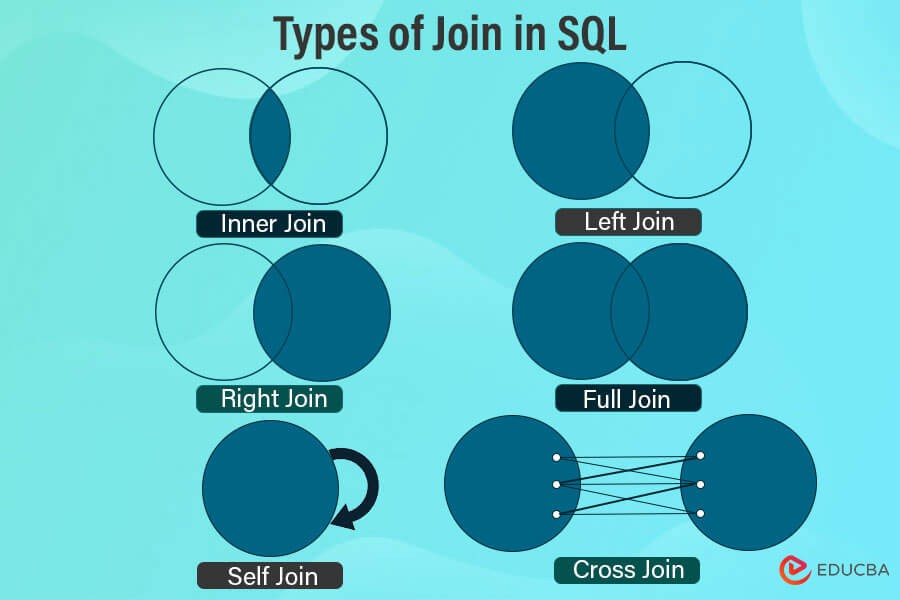


### For the following examples: Left table: Patients and Right Table: Immunizations
### INNER JOIN -This join returns rows when there is at least one match in both tables. If there is no match, the rows are not returned. It's the most common type of join.
### Find Matching Records
### Question: Which medical treatments have been administered to patients, including the patient's name and the cost of each treatment?

In [49]:
joined_df = immunizations_df.join(patients_df, immunizations_df.PATIENT == patients_df.Id).select(patients_df.FIRST, patients_df.LAST, immunizations_df.DESCRIPTION, immunizations_df.BASE_COST) \
    .orderBy(patients_df.FIRST.asc())

joined_df.show()

+--------+-----------+--------------------+---------+
|   FIRST|       LAST|         DESCRIPTION|BASE_COST|
+--------+-----------+--------------------+---------+
|Aaron697| Collins926|Influenza  season...|   140.52|
|Aaron697|Lindgren255|           varicella|   140.52|
|Aaron697|  Legros616|Influenza  season...|   140.52|
|Aaron697|    Metz686|Influenza  season...|   140.52|
|Aaron697|  Legros616|   HPV  quadrivalent|   140.52|
|Aaron697|Lindgren255|                 IPV|   140.52|
|Aaron697|   Sauer652|Influenza  season...|   140.52|
|Aaron697|  Walter473|Influenza  season...|   140.52|
|Aaron697| Cummings51|Influenza  season...|   140.52|
|Aaron697|Lindgren255|Influenza  season...|   140.52|
|Aaron697|Thompson596|Influenza  season...|   140.52|
|Aaron697|  Crooks415|Td (adult) preser...|   140.52|
|Aaron697|Thompson596|Td (adult) preser...|   140.52|
|Aaron697|Lindgren255|                DTaP|   140.52|
|Aaron697|  Rempel203|Influenza  season...|   140.52|
|Aaron697|    Brown30|Influe

### LEFT JOIN - (or LEFT OUTER JOIN): This returns all rows from the left table, and the matched rows from the right table. The result is NULL from the right side, if there is no match.
### Match and Show All Patients
### Question: For all patients, what treatments have they received, if any?

In [50]:
joined_df = patients_df.join(immunizations_df, patients_df.Id == immunizations_df.PATIENT, "left_outer") \
    .select(patients_df.FIRST, patients_df.LAST, immunizations_df.DESCRIPTION, immunizations_df.BASE_COST) \
    .orderBy(patients_df.FIRST.asc())

joined_df.show()


+--------+-----------+--------------------+---------+
|   FIRST|       LAST|         DESCRIPTION|BASE_COST|
+--------+-----------+--------------------+---------+
|Aaron697|    Beer512|Influenza  season...|   140.52|
|Aaron697| Roberts511|Influenza  season...|   140.52|
|Aaron697|Hartmann983|                 IPV|   140.52|
|Aaron697| Osinski784|Influenza  season...|   140.52|
|Aaron697| Ritchie586|Influenza  season...|   140.52|
|Aaron697|  Crooks415|Influenza  season...|   140.52|
|Aaron697| Murazik203|Influenza  season...|   140.52|
|Aaron697|Lindgren255|                 IPV|   140.52|
|Aaron697|  Legros616|Influenza  season...|   140.52|
|Aaron697|  Crooks415|Td (adult) preser...|   140.52|
|Aaron697|    Metz686|Influenza  season...|   140.52|
|Aaron697|Lindgren255|                DTaP|   140.52|
|Aaron697|  Legros616|   HPV  quadrivalent|   140.52|
|Aaron697|    Koch169|                NULL|     NULL|
|Aaron697|  Dooley940|Influenza  season...|   140.52|
|Aaron697|  Deckow585|Influe

### RIGHT JOIN - (or RIGHT OUTER JOIN): This returns all rows from the right table, and the matched rows from the left table. The result is NULL from the left side, if there is no match.
### - Match and Show All Immunizations
### Question: For all Immunizations recorded, which patients received them, if identifiable?

In [51]:
right_joined_df = immunizations_df.join(patients_df, immunizations_df.PATIENT == patients_df.Id, "left") \
    .select(patients_df.FIRST, patients_df.LAST, immunizations_df.DESCRIPTION, immunizations_df.BASE_COST) \
    .orderBy(immunizations_df.DESCRIPTION)

right_joined_df.show()

+-------------+-------------+-----------+---------+
|        FIRST|         LAST|DESCRIPTION|BASE_COST|
+-------------+-------------+-----------+---------+
|      Toby274|Altenwerth646|       DTaP|   140.52|
|    Felton646|   Labadie908|       DTaP|   140.52|
|   Lindsay928|      Dare640|       DTaP|   140.52|
|   Refugia211|Wintheiser220|       DTaP|   140.52|
|   Lindsay928|      Dare640|       DTaP|   140.52|
|    Felton646|   Labadie908|       DTaP|   140.52|
|    Manuel446|     Pagac496|       DTaP|   140.52|
|     Karyn217|   Mueller846|       DTaP|   140.52|
|    Shelby741|   Simonis280|       DTaP|   140.52|
|    Felton646|   Labadie908|       DTaP|   140.52|
|Cristopher265|      Smith67|       DTaP|   140.52|
|  Dorothea248|      Ward668|       DTaP|   140.52|
|    Shelby741|   Simonis280|       DTaP|   140.52|
|      Ross213|    Torphy630|       DTaP|   140.52|
|     Romeo514|     Bosco882|       DTaP|   140.52|
|  Humberto482|      Mann644|       DTaP|   140.52|
|       Sam8

### FULL OUTER JOIN (FULL JOIN ): This returns rows when there is a match in one of the tables. It effectively combines the results of both LEFT JOIN and RIGHT JOIN.
### - Comprehensive Match
### Question: What is the complete list of patients and their Immunizations, including those without recorded treatments or identifiable patients?

In [52]:
full_outer_joined_df = patients_df.join(immunizations_df, patients_df.Id == immunizations_df.PATIENT, "full_outer") \
    .select(patients_df.FIRST, patients_df.LAST, immunizations_df.DESCRIPTION, immunizations_df.BASE_COST) \
    .orderBy(patients_df.FIRST.asc())

full_outer_joined_df.show()

+--------+-----------+--------------------+---------+
|   FIRST|       LAST|         DESCRIPTION|BASE_COST|
+--------+-----------+--------------------+---------+
|Aaron697|    Beer512|Influenza  season...|   140.52|
|Aaron697| Roberts511|Influenza  season...|   140.52|
|Aaron697|Hartmann983|                 IPV|   140.52|
|Aaron697| Osinski784|Influenza  season...|   140.52|
|Aaron697| Ritchie586|Influenza  season...|   140.52|
|Aaron697|  Crooks415|Influenza  season...|   140.52|
|Aaron697| Murazik203|Influenza  season...|   140.52|
|Aaron697|Lindgren255|                 IPV|   140.52|
|Aaron697|  Legros616|Influenza  season...|   140.52|
|Aaron697|  Crooks415|Td (adult) preser...|   140.52|
|Aaron697|    Metz686|Influenza  season...|   140.52|
|Aaron697|Lindgren255|                DTaP|   140.52|
|Aaron697|  Legros616|   HPV  quadrivalent|   140.52|
|Aaron697|    Koch169|                NULL|     NULL|
|Aaron697|  Dooley940|Influenza  season...|   140.52|
|Aaron697|  Deckow585|Influe

## CROSS JOIN : This join returns a Cartesian product of the two tables, i.e., it returns rows combining each row from the first table with each row from the second table.
## - All Possible Combinations
## Question: What are all possible combinations of patients and immunizations? (sometimes it may not make sense; this is just for demonstration purpose)

In [53]:
cross_joined_df = patients_df.crossJoin(immunizations_df).select(patients_df.FIRST, patients_df.LAST, immunizations_df.DESCRIPTION)

cross_joined_df.show()


+---------------+--------------+--------------------+
|          FIRST|          LAST|         DESCRIPTION|
+---------------+--------------+--------------------+
|     Jacinto644|       Kris249|Influenza  season...|
|        Alva958|    Krajcik437|Influenza  season...|
|       Jimmie93|     Harris789|Influenza  season...|
|    Gregorio366|        Auer97|Influenza  season...|
|       Karyn217|    Mueller846|Influenza  season...|
|      Jayson808|      Fadel536|Influenza  season...|
|José Eduardo181|      Gómez206|Influenza  season...|
|        Milo271|       Feil794|Influenza  season...|
|       Karyn217|       Metz686|Influenza  season...|
|     Jeffrey461|Greenfelder433|Influenza  season...|
|     Mariana775|  Gulgowski816|Influenza  season...|
|       Leann224|     Deckow585|Influenza  season...|
|      Isabel214|   Hinojosa147|Influenza  season...|
|    Christal240|       Brown30|Influenza  season...|
|    Carmelia328| Konopelski743|Influenza  season...|
|        Raye931|      Wyman

### SELF JOIN - This is not a different type of join, but it's a regular join used to join a table to itself. It's useful for queries where you need to compare rows within the same table.
### Patients in the Same City
### Question: Which pair of patients are from the same city?

In [55]:
from pyspark.sql.functions import col

# Alias the DataFrame for both instances of the self-join
patients_a = patients_df.alias("A")
patients_b = patients_df.alias("B")

# Perform the self-join with conditions, ensuring to reference the alias
joined_df = patients_a.join(patients_b, (col("A.CITY") == col("B.CITY")) & (col("A.Id") != col("B.Id"))) \
    .select(col("A.FIRST").alias("FirstPatient"), col("B.FIRST").alias("SecondPatient"), col("A.CITY")) \
    .orderBy(col("A.CITY"))

joined_df.show()

+------------+-------------+--------+
|FirstPatient|SecondPatient|    CITY|
+------------+-------------+--------+
|     Tory770|     Shaun461|Abington|
|  Frankie174|     Shaun461|Abington|
|     Tory770|     Felix524|Abington|
|  Frankie174|     Felix524|Abington|
|     Tory770|     Susan422|Abington|
|  Frankie174|     Susan422|Abington|
|     Tory770|     India495|Abington|
|  Frankie174|     India495|Abington|
|     Tory770|    Stevie682|Abington|
|  Frankie174|    Stevie682|Abington|
|     Tory770|  Faustino767|Abington|
|  Frankie174|  Faustino767|Abington|
|     Tory770|     Jodie811|Abington|
|  Frankie174|     Jodie811|Abington|
|     Tory770|      Daria61|Abington|
|  Frankie174|      Daria61|Abington|
|     Tory770|  Claudine313|Abington|
|  Frankie174|  Claudine313|Abington|
|     Tory770|    Margot418|Abington|
|  Frankie174|    Margot418|Abington|
+------------+-------------+--------+
only showing top 20 rows



## Subqueries and Nested Selects

### Use subqueries to find patients based on specific criteria.

### Find all patients who have been prescribed medication with a base cost higher than the average base cost of all medications.

In [56]:
# Calculate the average BASE_COST from the medications DataFrame
avg_base_cost = medications_df.agg(F.avg("BASE_COST").alias("avg_cost")).collect()[0]["avg_cost"]

# Filter medications for rows where BASE_COST is higher than the average
medications_above_avg = medications_df.filter(medications_df["BASE_COST"] > avg_base_cost)

# Join the filtered medications DataFrame with the patients DataFrame to get the names
patients_with_high_cost_meds = patients_df.join(
    medications_above_avg,
    patients_df["Id"] == medications_above_avg["PATIENT"],
    "inner"
).select("FIRST", "LAST").distinct()

patients_with_high_cost_meds.show()

+-----------+--------------+
|      FIRST|          LAST|
+-----------+--------------+
|   Dwain139|   O'Conner199|
|    Rick943|     Parker433|
|     Cleo27|    Pacocha935|
| Joellen497|      Hills818|
| Stewart672|   Mosciski958|
| Cameron381|      Boyle917|
|   Carla633|   McKenzie376|
|    Rene434|Satterfield305|
|  Nadine465|    Quitzon246|
| Gregory545|    Osinski784|
|    Sona831|      Jerde200|
|      José3|   Ceballos171|
| Annetta101|      Kulas532|
|Emmanuel930|       Funk324|
|    Mack300|    Schuppe920|
| Gonzalo160|     O'Hara248|
|   Karie712|     Legros616|
|  Alfredo17| Stiedemann542|
|   Eloisa55|      Salinas3|
| Rosanna866|    Jenkins714|
+-----------+--------------+
only showing top 20 rows



## Correlated Subqueries
## Learn how to use correlated subqueries to perform row-specific comparisons.
## Find patients whose healthcare expenses are higher than the average expenses in their county.

In [57]:
# Step 1: Calculate average expenses by county
avg_expenses_by_county = patients_df.groupBy("COUNTY") \
    .agg(F.round(F.avg("HEALTHCARE_EXPENSES"), 2).alias("COUNTY_AVG_EXPENSES"))

# Step 2: Join the average expenses with the original patients DataFrame
patients_with_avg_expenses = patients_df.join(avg_expenses_by_county, "COUNTY")

# Step 3: Filter for patients with healthcare expenses above their county's average
patients_above_avg = patients_with_avg_expenses.filter(
    patients_with_avg_expenses.HEALTHCARE_EXPENSES > patients_with_avg_expenses.COUNTY_AVG_EXPENSES
).select(
    "FIRST",
    "LAST",
    "COUNTY",
    "HEALTHCARE_EXPENSES",
    F.col("COUNTY_AVG_EXPENSES").alias("ROUNDED_AVG_HEALTHCARE_EXPENSES")
)

patients_above_avg.show()

+------------+--------------+----------------+-------------------+-------------------------------+
|       FIRST|          LAST|          COUNTY|HEALTHCARE_EXPENSES|ROUNDED_AVG_HEALTHCARE_EXPENSES|
+------------+--------------+----------------+-------------------+-------------------------------+
|     Milo271|       Feil794|Middlesex County|          880850.51|                      841491.73|
|  Mariana775|  Gulgowski816|Middlesex County|          883040.92|                      841491.73|
|   Isabel214|   Hinojosa147|  Bristol County|         1137386.19|                      793296.73|
| Christal240|       Brown30|  Suffolk County|          761931.85|                      664340.79|
|     Raye931|      Wyman904|  Norfolk County|         1469472.08|                      874351.83|
|    Amada498|     Spinka232|  Norfolk County|         1400772.46|                      874351.83|
|    Danae973|   Franecki195|Middlesex County|         1507529.08|                      841491.73|
|   Anissa

## Find patients whose healthcare coverage is above the average of their respective city.

In [58]:
# Step 1
city_avg_coverage = patients_df.groupBy("CITY").agg(F.avg("HEALTHCARE_COVERAGE").alias("AVG_COVERAGE"))

# Step 2
patients_with_city_avg = patients_df.join(city_avg_coverage, "CITY")

# Step 3
patients_above_city_avg = patients_with_city_avg.filter(patients_with_city_avg["HEALTHCARE_COVERAGE"] > patients_with_city_avg["AVG_COVERAGE"])

# Step 4
final_df = patients_above_city_avg.select(
    "FIRST",
    "LAST",
    "CITY",
    F.round("HEALTHCARE_COVERAGE", 2).alias("INDIVIDUAL_COVERAGE"),
    F.round("AVG_COVERAGE", 2).alias("CITY_AVERAGE_COVERAGE")
)

final_df.show()

+-------------+-------------+-------------+-------------------+---------------------+
|        FIRST|         LAST|         CITY|INDIVIDUAL_COVERAGE|CITY_AVERAGE_COVERAGE|
+-------------+-------------+-------------+-------------------+---------------------+
|  Carmelia328|Konopelski743|      Ashland|           72357.13|             11317.82|
|     Danae973|  Franecki195|   Framingham|           19755.11|             11988.99|
|    Anissa357|   Mueller846|      Waltham|           15054.36|             14495.07|
|   Margert370|   DuBuque211|       Malden|           36869.19|             14078.74|
|      Evia329|    Heller342|    Westfield|           25110.07|             12653.19|
|   Caterina17|    Hirthe744|    Fitchburg|           17405.74|              12306.5|
|        Tia76|    Spinka232|Middleborough|           20767.46|             12223.34|
|    Sammie902| Greenholt190|     Plymouth|           20322.88|             10826.53|
|     Jamey282|  Hermiston71|      Concord|           

## FUNCTIONS

## String Functions
## CONCAT: Concatenates two or more strings.

In [59]:
full_name_df = patients_df.select(F.concat_ws(" ", patients_df.FIRST, patients_df.LAST).alias("FullName")).limit(10)
full_name_df.show()

+--------------------+
|            FullName|
+--------------------+
|  Jacinto644 Kris249|
|  Alva958 Krajcik437|
|  Jimmie93 Harris789|
|  Gregorio366 Auer97|
| Karyn217 Mueller846|
|  Jayson808 Fadel536|
|José Eduardo181 G...|
|     Milo271 Feil794|
|    Karyn217 Metz686|
|Jeffrey461 Greenf...|
+--------------------+



## DATALENGTH: Returns the number of bytes used to represent any expression.

In [60]:
length_in_bytes_df = patients_df.select("FIRST", F.length("FIRST").alias("LengthInBytes")).limit(10)
length_in_bytes_df.show()

+---------------+-------------+
|          FIRST|LengthInBytes|
+---------------+-------------+
|     Jacinto644|           10|
|        Alva958|            7|
|       Jimmie93|            8|
|    Gregorio366|           11|
|       Karyn217|            8|
|      Jayson808|            9|
|José Eduardo181|           15|
|        Milo271|            7|
|       Karyn217|            8|
|     Jeffrey461|           10|
+---------------+-------------+



### LEFT: Returns the left part of a character string with the specified number of characters.

In [61]:
initials_df = patients_df.select(F.expr("substr(FIRST, 1, 5)").alias("Initial")).limit(10)
initials_df.show()

+-------+
|Initial|
+-------+
|  Jacin|
|  Alva9|
|  Jimmi|
|  Grego|
|  Karyn|
|  Jayso|
|  José |
|  Milo2|
|  Karyn|
|  Jeffr|
+-------+



### RIGHT: Returns the right part of a character string with the specified number of characters.

In [62]:
result_df = patients_df.withColumn("LastSixChars", F.expr("substr(FIRST, length(FIRST)-5, 6)"))
result_df.select("FIRST", "LastSixChars").limit(10).show()

+---------------+------------+
|          FIRST|LastSixChars|
+---------------+------------+
|     Jacinto644|      nto644|
|        Alva958|      lva958|
|       Jimmie93|      mmie93|
|    Gregorio366|      rio366|
|       Karyn217|      ryn217|
|      Jayson808|      son808|
|José Eduardo181|      rdo181|
|        Milo271|      ilo271|
|       Karyn217|      ryn217|
|     Jeffrey461|      rey461|
+---------------+------------+



### LOWER: Converts all characters in the specified string to lowercase.
### UPPER: Convert to uppercase

In [63]:
transformed_names_df = patients_df.select(
    F.lower(F.col("FIRST")).alias("LowercaseFirstName"),
    F.upper(F.col("LAST")).alias("UppercaseLastName")
).limit(10)

transformed_names_df.show()

+------------------+-----------------+
|LowercaseFirstName|UppercaseLastName|
+------------------+-----------------+
|        jacinto644|          KRIS249|
|           alva958|       KRAJCIK437|
|          jimmie93|        HARRIS789|
|       gregorio366|           AUER97|
|          karyn217|       MUELLER846|
|         jayson808|         FADEL536|
|   josé eduardo181|         GÓMEZ206|
|           milo271|          FEIL794|
|          karyn217|          METZ686|
|        jeffrey461|   GREENFELDER433|
+------------------+-----------------+



### LTRIM: Removes leading spaces from a string.

In [64]:
trimmed_address_df = patients_df.select(F.ltrim(patients_df.ADDRESS).alias("TrimmedAddress")).limit(10)
trimmed_address_df.show()

+--------------------+
|      TrimmedAddress|
+--------------------+
|888 Hickle Ferry ...|
| 1048 Skiles Trailer|
|201 Mitchell Lodg...|
|1050 Lindgren Ext...|
|570 Abshire Forge...|
|1056 Harris Lane ...|
|427 Balistreri Wa...|
|422 Farrell Path ...|
|181 Feest Passage...|
|428 Wiza Glen Uni...|
+--------------------+



#### REGEXP_REPLACE can use regular expressions to strip numeric characters:

In [66]:
modified_df = patients_df.select(
    "FIRST",
    F.regexp_replace("FIRST", '[0-9]', '').alias("FirstNameStripped"),
    "LAST",
    F.regexp_replace("LAST", '[0-9]', '').alias("LastNameStripped")
)

modified_df.show()

+---------------+-----------------+--------------+----------------+
|          FIRST|FirstNameStripped|          LAST|LastNameStripped|
+---------------+-----------------+--------------+----------------+
|     Jacinto644|          Jacinto|       Kris249|            Kris|
|        Alva958|             Alva|    Krajcik437|         Krajcik|
|       Jimmie93|           Jimmie|     Harris789|          Harris|
|    Gregorio366|         Gregorio|        Auer97|            Auer|
|       Karyn217|            Karyn|    Mueller846|         Mueller|
|      Jayson808|           Jayson|      Fadel536|           Fadel|
|José Eduardo181|     José Eduardo|      Gómez206|           Gómez|
|        Milo271|             Milo|       Feil794|            Feil|
|       Karyn217|            Karyn|       Metz686|            Metz|
|     Jeffrey461|          Jeffrey|Greenfelder433|     Greenfelder|
|     Mariana775|          Mariana|  Gulgowski816|       Gulgowski|
|       Leann224|            Leann|     Deckow58

### REPLACE: Replaces all occurrences of a specified string value with another string value.

In [65]:
filtered_patients_df = patients_df.filter(patients_df.ADDRESS.contains("Street")).select(
        "FIRST",
        "LAST",
        F.col("ADDRESS").alias("LongAddress"),
        F.regexp_replace("ADDRESS", "Street", "St").alias("ShortAddress")
    ).limit(10)

filtered_patients_df.show()

+----------+-------------+--------------------+--------------------+
|     FIRST|         LAST|         LongAddress|        ShortAddress|
+----------+-------------+--------------------+--------------------+
| Lorrie905|    Leannon79|   813 Casper Street|       813 Casper St|
|    Asa127|     Block661|140 Rohan Street ...|140 Rohan St Suit...|
|  Logan497|    Brekke496|     1081 Orn Street|         1081 Orn St|
| Cletus494|   Strosin214|   1019 Haley Street|       1019 Haley St|
|Cortney940|     Stehr398|  458 Streich Street|      458 Streich St|
|Latoyia537|   Gaylord332|   200 Heaney Street|       200 Heaney St|
|  Clark193|     Hilll811|202 Tromp Street ...|202 Tromp St Suite 0|
|     Jc393|     Bosco882|    792 Walsh Street|        792 Walsh St|
|   Noel608|Swaniawski813|   155 Walter Street|       155 Walter St|
|   Sari509|     Hoppe518|550 Lang Street S...|550 Lang St Suite 65|
+----------+-------------+--------------------+--------------------+



### SUBSTRING: Returns part of a character, binary, text,

In [67]:
result_df = patients_df.select("FIRST", F.substring("FIRST", 1, 4).alias("FirstFourChars")).limit(5)
result_df.show()

+-----------+--------------+
|      FIRST|FirstFourChars|
+-----------+--------------+
| Jacinto644|          Jaci|
|    Alva958|          Alva|
|   Jimmie93|          Jimm|
|Gregorio366|          Greg|
|   Karyn217|          Kary|
+-----------+--------------+

